In [1]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from sklearn import datasets

In [2]:
boston=datasets.load_boston()

In [3]:
data_train = np.loadtxt("boston_train.csv", delimiter=",")
data_test = np.loadtxt("boston_test.csv", delimiter=",")

In [4]:
x_train=pd.DataFrame(data_train[:,:-1])
y_train=data_train[:,-1:]
x_test=pd.DataFrame(data_test.copy())

In [39]:
boston.feature_names
data_train.feature_names

AttributeError: 'numpy.ndarray' object has no attribute 'feature_names'

In [5]:
df = pd.DataFrame(x_train)
df.columns = boston.feature_names

for column in df.columns:
    name = column+"_"+column
    df[name] = df[column]**2
    
x2_train = df.values
x2_train.shape

(379, 26)

In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,CHAS_CHAS,NOX_NOX,RM_RM,AGE_AGE,DIS_DIS,RAD_RAD,TAX_TAX,PTRATIO_PTRATIO,B_B,LSTAT_LSTAT
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,...,379.000000,379.000000,379.000000,379.000000,3.790000e+02,379.000000,379.000000,379.000000,379.000000,379.000000
mean,0.019628,0.002455,0.036170,0.028955,0.028775,0.032202,0.038395,-0.001288,0.043307,0.043786,...,1.098326,0.997504,1.000742,0.969551,1.053594e+00,1.031945,1.039519,0.998321,1.029370,1.028610
std,1.067490,1.000813,1.017497,1.048995,0.999656,1.001174,0.985209,1.027803,1.016265,1.019974,...,3.562178,1.396079,1.935390,1.008492,1.658692e+00,1.087950,0.946287,1.318942,3.077050,1.508958
min,-0.417713,-0.487722,-1.516987,-0.272599,-1.465882,-3.880249,-2.335437,-1.267069,-0.982843,-1.313990,...,0.074310,0.001645,0.000004,0.000020,4.799164e-07,0.031727,0.000269,0.000423,0.000012,0.000003
25%,-0.408171,-0.487722,-0.867691,-0.272599,-0.878475,-0.571480,-0.768994,-0.829872,-0.637962,-0.755697,...,0.074310,0.159407,0.069469,0.279809,1.932673e-01,0.273531,0.264064,0.118483,0.100486,0.134259
50%,-0.383729,-0.487722,-0.180458,-0.272599,-0.144217,-0.103479,0.338718,-0.329213,-0.523001,-0.440915,...,0.074310,0.635784,0.319303,0.779327,6.304826e-01,0.406995,0.616844,0.650565,0.164186,0.572306
75%,0.055208,0.156071,1.015999,-0.272599,0.628913,0.529069,0.911243,0.674172,1.661245,1.530926,...,0.074310,1.427365,0.947824,1.246801,1.161516e+00,2.759736,2.343736,1.283215,0.194527,1.246537
max,9.941735,3.804234,2.422565,3.668398,2.732346,3.555044,1.117494,3.960518,1.661245,1.798194,...,13.457143,7.465717,15.056335,5.454266,1.568570e+01,2.759736,3.233502,7.329902,15.078246,11.628092


In [7]:
df1 = pd.DataFrame(x_test)
df1.columns = boston.feature_names

for column in df1.columns:
    name = column+"_"+column
    df1[name] = df1[column]**2
    
df1.describe()
x2_test = df1.values
x2_test.shape

(127, 26)

In [8]:
# we have scale the training and testing data
scaler = preprocessing.StandardScaler()
scaler.fit(x2_train)
x2_train = scaler.transform(x2_train)
x2_test = scaler.transform(x2_test)

In [13]:
len(x2_train),len(x2_train[0])

(379, 26)

In [14]:
len(x2_train[:,0])

379

In [20]:
P = np.ones((len(x2_train), len(x2_train[0]) + 1))
print(P)
print(P.shape)
P[:,:-1] = x2_train
print(P)
x3_train = P

Q = np.ones((len(x2_test), len(x2_test[0]) + 1))
Q[:,:-1] = x2_test
x3_test = Q

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
(379, 27)
[[-0.40098068 -0.49042688 -1.28149216 ... -0.28011888  0.11743628
   1.        ]
 [-0.40053396 -0.49042688  0.20753471 ... -0.30738521 -0.50280925
   1.        ]
 [ 0.09900799 -0.49042688  0.96425328 ...  4.35364339 -0.15567276
   1.        ]
 ...
 [-0.40141319 -0.49042688  0.20753471 ... -0.29909084 -0.60852403
   1.        ]
 [-0.40357903 -0.49042688 -1.16949207 ... -0.32153268 -0.31450873
   1.        ]
 [ 0.30324229 -0.49042688  0.96425328 ... -0.28601598  0.54247549
   1.        ]]


In [21]:
x3_train=np.array(x3_train)
x3_test=np.array(x3_test)

In [28]:
x3_train[0] # it is give the 0th row values 

array([-0.40098068, -0.49042688, -1.28149216, -0.28784917, -0.60591662,
        1.20795021,  0.81483835, -0.50560448, -0.7845217 , -1.29796291,
       -0.32264241,  0.42027996, -1.10095452, -0.13620605, -0.30930955,
        0.62507565, -0.28784917, -0.47737514,  0.27772315, -0.26187069,
       -0.47263382, -0.42802331,  0.62925603, -0.68816762, -0.28011888,
        0.11743628,  1.        ])

In [29]:
def step_gradient(x,y,alpha,m):
    m_slope = np.zeros(len(m))
    M = len(x)
    N = len(x[0])
    
    for i in range(M):
        for j in range(N):
            m_slope[j] += (-2/M)*(y[i]-(m*x[i]).sum())*x[i][j]
    m = m - alpha*m_slope
    return m

In [30]:
def cost(x,y,m):
    cost = 0   # initilize cost zero
    M = len(x) # it is give the length of the rows
    
    for i in range(M):
        cost += (y[i]-(m*x[i]).sum())**2 
        # it will give sum of all cost(MSE)
        
    return cost/M

In [31]:
def gradient_descent(x,y,alpha,n):
    M = len(x)      # it will give length of the rows
    N = len(x[0])   # it will give length of the features
    m = np.zeros(N) # it will give np array with initilize to all zero
    costs = []
    itr = []
    for i in range(n):
        m = step_gradient(x,y,alpha,m)
        cos = cost(x,y,m)
        costs.append(cos)
        itr.append(i)
        print(i,"Cost: ",cos)
    return m,costs,itr

In [32]:
def predict(x,m):
    M = len(x)
    y_pred = np.zeros(M)
    
    for i in range(M):
        y_pred[i] = (m*x[i]).sum()
        
    return y_pred

In [33]:
import matplotlib.pyplot as plt
learning_rate = 0.054
num_of_iterations =1000
m,costs,itr=gradient_descent(x3_train,y_train, learning_rate, num_of_iterations)
print(*m)

0 Cost:  [454.4556374]
1 Cost:  [362.37255391]
2 Cost:  [290.64070064]
3 Cost:  [234.27933692]
4 Cost:  [189.85849948]
5 Cost:  [154.76992586]
6 Cost:  [127.004845]
7 Cost:  [105.00403433]
8 Cost:  [87.5503716]
9 Cost:  [73.68984888]
10 Cost:  [62.67239843]
11 Cost:  [53.9069297]
12 Cost:  [46.9268044]
13 Cost:  [41.36311987]
14 Cost:  [36.92391493]
15 Cost:  [33.37791454]
16 Cost:  [30.54178022]
17 Cost:  [28.27008444]
18 Cost:  [26.44741085]
19 Cost:  [24.98211969]
20 Cost:  [23.80142087]
21 Cost:  [22.84747625]
22 Cost:  [22.07431352]
23 Cost:  [21.44538085]
24 Cost:  [20.93160802]
25 Cost:  [20.50986846]
26 Cost:  [20.16175863]
27 Cost:  [19.87262897]
28 Cost:  [19.63081436]
29 Cost:  [19.42702272]
30 Cost:  [19.25384928]
31 Cost:  [19.1053905]
32 Cost:  [18.97693722]
33 Cost:  [18.86473064]
34 Cost:  [18.76576836]
35 Cost:  [18.67765009]
36 Cost:  [18.59845496]
37 Cost:  [18.5266439]
38 Cost:  [18.460982]
39 Cost:  [18.40047673]
40 Cost:  [18.34432881]
41 Cost:  [18.29189302]
42 C

334 Cost:  [16.29634829]
335 Cost:  [16.29522404]
336 Cost:  [16.29410695]
337 Cost:  [16.29299698]
338 Cost:  [16.29189408]
339 Cost:  [16.29079819]
340 Cost:  [16.28970928]
341 Cost:  [16.28862729]
342 Cost:  [16.28755217]
343 Cost:  [16.28648389]
344 Cost:  [16.2854224]
345 Cost:  [16.28436764]
346 Cost:  [16.28331958]
347 Cost:  [16.28227817]
348 Cost:  [16.28124336]
349 Cost:  [16.28021512]
350 Cost:  [16.27919339]
351 Cost:  [16.27817814]
352 Cost:  [16.27716931]
353 Cost:  [16.27616688]
354 Cost:  [16.27517079]
355 Cost:  [16.274181]
356 Cost:  [16.27319747]
357 Cost:  [16.27222017]
358 Cost:  [16.27124904]
359 Cost:  [16.27028404]
360 Cost:  [16.26932515]
361 Cost:  [16.26837231]
362 Cost:  [16.26742548]
363 Cost:  [16.26648463]
364 Cost:  [16.26554972]
365 Cost:  [16.2646207]
366 Cost:  [16.26369754]
367 Cost:  [16.2627802]
368 Cost:  [16.26186865]
369 Cost:  [16.26096283]
370 Cost:  [16.26006272]
371 Cost:  [16.25916827]
372 Cost:  [16.25827946]
373 Cost:  [16.25739624]
374 C

665 Cost:  [16.13862833]
666 Cost:  [16.13848192]
667 Cost:  [16.13833639]
668 Cost:  [16.13819173]
669 Cost:  [16.13804793]
670 Cost:  [16.13790499]
671 Cost:  [16.13776292]
672 Cost:  [16.13762169]
673 Cost:  [16.1374813]
674 Cost:  [16.13734176]
675 Cost:  [16.13720305]
676 Cost:  [16.13706517]
677 Cost:  [16.13692812]
678 Cost:  [16.13679188]
679 Cost:  [16.13665646]
680 Cost:  [16.13652185]
681 Cost:  [16.13638805]
682 Cost:  [16.13625504]
683 Cost:  [16.13612283]
684 Cost:  [16.13599141]
685 Cost:  [16.13586078]
686 Cost:  [16.13573092]
687 Cost:  [16.13560185]
688 Cost:  [16.13547354]
689 Cost:  [16.135346]
690 Cost:  [16.13521922]
691 Cost:  [16.1350932]
692 Cost:  [16.13496794]
693 Cost:  [16.13484342]
694 Cost:  [16.13471964]
695 Cost:  [16.1345966]
696 Cost:  [16.1344743]
697 Cost:  [16.13435273]
698 Cost:  [16.13423188]
699 Cost:  [16.13411176]
700 Cost:  [16.13399235]
701 Cost:  [16.13387365]
702 Cost:  [16.13375567]
703 Cost:  [16.13363838]
704 Cost:  [16.1335218]
705 Cos

995 Cost:  [16.117433]
996 Cost:  [16.11741229]
997 Cost:  [16.11739169]
998 Cost:  [16.11737122]
999 Cost:  [16.11735087]
-3.192731518531569 -0.7799662266847727 -0.2701433195199543 0.43509942861324064 -3.100269736804656 1.5095652449537829 0.1921204455003848 -3.7304249466327386 3.8426353020151094 -2.078988536527284 -1.4744606113224714 -0.313624201784425 -5.622756725758241 1.481432558042908 0.37891590001987274 0.43478155788068623 0.43509942861324197 -0.09447316850684992 1.4906629665211644 0.2666441836223729 1.2878362662845222 -0.2173979188132553 0.10585347592154981 0.8904209958935317 -0.8300778985176527 1.830280750520919 22.60949868073877


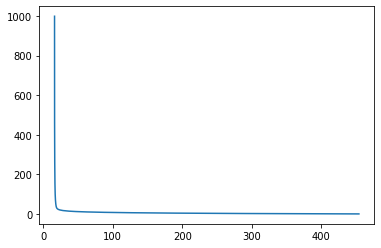

In [34]:
plt.plot(costs,itr)
plt.show()

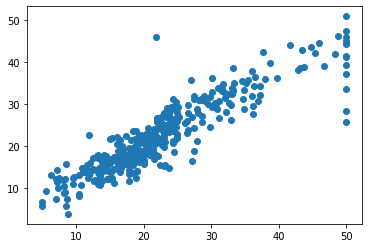

In [140]:
y_train_pred = predict(x3_train,m)
plt.scatter(y_train , y_train_pred)
plt.show()

In [141]:
y_test_pred = predict(x3_test,m)
np.savetxt("boston_pred.csv",y_test_pred)